In [1]:
import pandas as pd

In [104]:
# reading rounds2.csv file
rounds2_df =  pd.read_csv('C:/Users/MAHAJAN/Desktop/Upgrad Resources/Assignment 1/rounds2.csv',encoding= 'unicode_escape')

In [105]:
# checking the columns in the dataframe
rounds2_df.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [106]:
#converting the column company_permalink to upper case
rounds2_df['company_permalink'] = rounds2_df['company_permalink'].str.upper()

In [107]:
# checking if any value is null for column company_permalink
rounds2_df['company_permalink'].isnull().any()

False

In [108]:
# finding length of unique values of company_permalink
len(rounds2_df['company_permalink'].unique())

66370

In [109]:
# reading companies.txt file
companies_df = pd.read_csv('C:/Users/MAHAJAN/Desktop/Upgrad Resources/Assignment 1/companies.txt', sep="	",encoding= 'unicode_escape')

In [110]:
companies_df.head(2)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


In [111]:
#converting the column permalink to upper case
companies_df['permalink'] = companies_df['permalink'].str.upper()

In [112]:
# checking if any value is null for column permalink
companies_df['permalink'].isnull().any()

False

In [113]:
# finding length of unique companies name
len(companies_df.permalink.unique())

66368

In [114]:
# getting the number of entries in companies dataframe
len(companies_df)

66368

In [115]:
# getting the number of entries in rounds2 dataframe
len(rounds2_df)

114949

In [116]:
# merging companies dataframe and rounds2 dataframe
merge_df = rounds2_df.merge(companies_df, left_on='company_permalink', right_on='permalink', how="left")

In [117]:
# checking the length of the data frame created after merging both the dataframe
len(merge_df)

114949

In [118]:
# getting the number of null values for each column
merge_df.isnull().sum(axis=0)

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      7
name                           8
homepage_url                6139
category_list               3414
status                         7
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20527
dtype: int64

In [119]:
# getting the percentage of null values of each column
round(100*(merge_df.isnull().sum()/len(merge_df.index)), 2)

company_permalink          0.000
funding_round_permalink    0.000
funding_round_type         0.000
funding_round_code        72.910
funded_at                  0.000
raised_amount_usd         17.390
permalink                  0.010
name                       0.010
homepage_url               5.340
category_list              2.970
status                     0.010
country_code               7.550
state_code                 9.520
region                     8.840
city                       8.840
founded_at                17.860
dtype: float64

In [120]:
# since we need to perform the actions on three columns raised_amount_usd, country_code and category_list
# so removing all the null entries for these columns

In [121]:
# removing rows will null raised_amount_usd
merge_df = merge_df[pd.notnull(merge_df['raised_amount_usd'])]

In [122]:
# getting the length after removing some null entries
len(merge_df)

94959

In [123]:
# removing rows will null country_code
merge_df = merge_df[pd.notnull(merge_df['country_code'])]

In [124]:
# getting the length after removing some null entries
len(merge_df)

89108

In [125]:
# removing rows will null category_list
merge_df = merge_df[pd.notnull(merge_df['category_list'])]

In [126]:
# getting the length after removing some null entries
len(merge_df)

88529

In [127]:
# setting the float format to displat the floating values correctly
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [128]:
# performing the groupby on funding_round_type and getting the mean value of raised_amount_usd
merge_df_grp_fund_type = merge_df.groupby('funding_round_type')['raised_amount_usd'].mean()

In [129]:
merge_df_grp_fund_type1 = merge_df_grp_fund_type.reset_index()

In [130]:
# arraning the funding round type on the decreasing order of invetment 
merge_df_grp_fund_type.reset_index().sort_values(by='raised_amount_usd', ascending=False)

,funding_round_type,raised_amount_usd
6,post_ipo_debt,169451789.775
10,secondary_market,84438532.250
8,private_equity,73938486.275
7,post_ipo_equity,66077058.574
2,debt_financing,17167653.472
12,undisclosed,15891661.389
13,venture,11724222.690
4,grant,4512698.294
9,product_crowdfunding,1353226.909
1,convertible_note,1337186.647


In [131]:
# grouping the data on country_code and summing the raised_amount_usd
country_code_wise_investment = merge_df.groupby('country_code')['raised_amount_usd'].sum().reset_index().sort_values(by='raised_amount_usd', ascending=False)

In [132]:
country_code_wise_investment

,country_code,raised_amount_usd
127,USA,665782068320.000
22,CHN,75207065796.000
41,GBR,32436812830.000
54,IND,27383831560.000
19,CAN,18304117219.000
105,RUS,11277449213.000
30,DEU,9970512161.000
58,ISR,9655727871.000
40,FRA,9022653438.000
89,NLD,5931105404.000


In [133]:
# spliting the category_list and getting the first element from the split result
merge_df.category_list = merge_df.category_list.str.split('|').str[0]

In [134]:
merge_df.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.000,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms,operating,USA,DE,DE - Other,Delaware City,04-09-2014


In [135]:
# reading the mapping.csv file
mapping_df = pd.read_csv('C:/Users/MAHAJAN/Desktop/Upgrad Resources/Assignment 1/mapping.csv',encoding= 'unicode_escape')

In [136]:
# getting the length of the dataframe
len(mapping_df)

688

In [137]:
# does mapping dataframe has null value for category_list
mapping_df['category_list'].isnull().any()

True

In [138]:
# remove rows with null category_list
mapping_df = mapping_df[pd.notnull(mapping_df['category_list'])]

In [139]:
len(mapping_df)

687

In [140]:
# deriving the main_sector
def getCategory(row):
    if row['Automotive & Sports'] == 1:
        return 'Automotive & Sports'
    elif row['Blanks'] == 1:
        return 'Blanks'
    elif row['Cleantech / Semiconductors'] == 1:
        return 'Cleantech / Semiconductors'
    elif row['Entertainment'] == 1:
        return 'Entertainment'
    elif row['Health'] == 1:
        return 'Health'
    elif row['Manufacturing'] == 1:
        return 'Manufacturing'
    elif row['News, Search and Messaging'] == 1:
        return 'News, Search and Messaging'
    elif row['Others'] == 1:
        return 'Others'
    elif row['Social, Finance, Analytics, Advertising'] == 1:
        return 'Social, Finance, Analytics, Advertising'
    else:
        return None

mapping_df['main_sector'] = mapping_df.apply (lambda row: getCategory(row), axis=1)

In [141]:
# getting the data frame with required columns only
mapping_df = mapping_df[['category_list','main_sector']] 

In [142]:
# merging the merge_df with mapping dataframe
merge_df_with_mapping = merge_df.merge(mapping_df, left_on='category_list', right_on='category_list', how='left')

In [143]:
merge_df_with_mapping.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Entertainment
1,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.000,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms,operating,USA,DE,DE - Other,Delaware City,04-09-2014,"News, Search and Messaging"
2,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.000,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,"News, Search and Messaging"
3,/ORGANIZATION/01GAMES-TECHNOLOGY,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.000,/ORGANIZATION/01GAMES-TECHNOLOGY,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,Entertainment
4,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.000,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Cleantech / Semiconductors


In [144]:
# getting the length of the merged dataframe
len(merge_df_with_mapping)

88529

In [145]:
# USA dataframe with investment between 5M $ to 15M $
df1 = merge_df_with_mapping[(merge_df_with_mapping['country_code'] == 'USA') & (merge_df_with_mapping['raised_amount_usd'] >= 5000000) & ((merge_df_with_mapping['raised_amount_usd'] <= 15000000))]

In [146]:
# doing the grouping on main_sector for USA dataframe and calculing the amount invested
df1_grpby = df1.groupby(['main_sector'])['raised_amount_usd'].agg(['sum', 'count']).reset_index()

In [147]:
df1_merge = df1.merge(df1_grpby, left_on='main_sector', right_on='main_sector', how='left')

In [148]:
# getting the count of number of investement 
df1_merge.raised_amount_usd.count()

13703

In [149]:
# getting the total sum of investment 
df1_merge.raised_amount_usd.sum()

121446307941.0

In [150]:

df1_merge_grp = df1_merge.groupby(['main_sector'])['raised_amount_usd'].agg(['sum','count']).reset_index().sort_values(by='sum', ascending=False)

In [151]:
df1_merge_grp

,main_sector,sum,count
6,Others,28913998107.000,3267
1,Cleantech / Semiconductors,25524174430.000,2792
7,"Social, Finance, Analytics, Advertising",18061197771.000,2086
5,"News, Search and Messaging",14679149951.000,1677
3,Health,9957338264.000,1118
4,Manufacturing,8129982494.000,900
2,Entertainment,5433507339.000,633
0,Automotive & Sports,1678993953.000,195


In [152]:
# for USA df getting the entries with main_sector as 'Others'
df1_others = df1[df1['main_sector'] == 'Others']

In [153]:
# performing the grouping on company name and getting the sum of raised amount and retreving the company name with top investment
df1_others.groupby(['permalink'])['raised_amount_usd'].sum().reset_index().sort_values(by='raised_amount_usd', ascending=False).head(1)

,permalink,raised_amount_usd
654,/ORGANIZATION/EMORY-UNIVERSITY,81500000.000


In [154]:
# for USA df getting the entries with main_sector as 'Cleantech / Semiconductors'
# performing the grouping on company name and getting the sum of raised amount and retreving the company name with top investment
df1_cleantech = df1[df1['main_sector'] == 'Cleantech / Semiconductors']
df1_cleantech.groupby(['permalink'])['raised_amount_usd'].sum().reset_index().sort_values(by='raised_amount_usd', ascending=False).head(1)

,permalink,raised_amount_usd
283,/ORGANIZATION/BIODESIX,75300000.000


In [155]:
# GBR dataframe with investment between 5M $ to 15M $
df2 = merge_df_with_mapping[(merge_df_with_mapping['country_code'] == 'GBR') & (merge_df_with_mapping['raised_amount_usd'] >= 5000000) & ((merge_df_with_mapping['raised_amount_usd'] <= 15000000))]

In [156]:
# grouping the dataframe on main_sector and getting the count and sum of investment done
df2_grpby = df2.groupby(['main_sector'])['raised_amount_usd'].agg(['sum', 'count']).reset_index()

In [157]:
df2_merge = df2.merge(df2_grpby, left_on='main_sector', right_on='main_sector', how='left')

In [158]:
# finding the number of investment done
df2_merge.raised_amount_usd.count()

756

In [159]:
# getting the total investment done
df2_merge.raised_amount_usd.sum()

6487012391.0

In [160]:

df2_merge_grp = df2_merge.groupby(['main_sector'])['raised_amount_usd'].agg(['sum','count']).reset_index().sort_values(by='sum', ascending=False)

In [161]:
df2_merge_grp

,main_sector,sum,count
6,Others,1463714338.000,168
1,Cleantech / Semiconductors,1412091142.000,161
7,"Social, Finance, Analytics, Advertising",922726255.000,109
5,"News, Search and Messaging",795798998.000,95
2,Entertainment,496306688.000,58
4,Manufacturing,482368699.000,56
3,Health,281047028.000,33
0,Automotive & Sports,206020388.000,21


In [162]:
# from the GBR dataframe retreiving the rows with main_Sector as 'Others' and getting the company name with highest investment
df2_others = df2[df2['main_sector'] == 'Others']
df2_others.groupby(['permalink'])['raised_amount_usd'].sum().reset_index().sort_values(by='raised_amount_usd', ascending=False).head(1)

,permalink,raised_amount_usd
55,/ORGANIZATION/IP-ACCESS,39683329.000


In [163]:
# from the GBR dataframe retreiving the rows with main_Sector as 'Cleantech / Semiconductors' and getting the company name with highest investment
df2_cleantech = df2[df2['main_sector'] == 'Cleantech / Semiconductors']
df2_cleantech.groupby(['permalink'])['raised_amount_usd'].sum().reset_index().sort_values(by='raised_amount_usd', ascending=False).head(1)

,permalink,raised_amount_usd
37,/ORGANIZATION/EUSA-PHARMA,35600000.000


In [164]:
# IND dataframe with investment between 5M $ to 15M $
df3 = merge_df_with_mapping[(merge_df_with_mapping['country_code'] == 'IND') & (merge_df_with_mapping['raised_amount_usd'] >= 5000000) & ((merge_df_with_mapping['raised_amount_usd'] <= 15000000))]

In [165]:
# grouping the dataframe on main_sector and getting the count and sum of investment done
df3_grpby = df3.groupby(['main_sector'])['raised_amount_usd'].agg(['sum', 'count']).reset_index()

In [166]:
df3_merge = df3.merge(df3_grpby, left_on='main_sector', right_on='main_sector', how='left')

In [167]:
# getting the number of investment done
df3_merge.raised_amount_usd.count()

345

In [168]:
# getting the total investment done
df3_merge.raised_amount_usd.sum()

3076662363.0

In [169]:
df3_merge_grp = df3_merge.groupby(['main_sector'])['raised_amount_usd'].agg(['sum','count']).reset_index().sort_values(by='sum', ascending=False)

In [170]:
df3_merge_grp

,main_sector,sum,count
6,Others,1055028268.000,115
5,"News, Search and Messaging",439834545.000,53
7,"Social, Finance, Analytics, Advertising",309043500.000,35
2,Entertainment,293830000.000,34
4,Manufacturing,200900000.000,21
1,Cleantech / Semiconductors,173980000.000,21
3,Health,173740000.000,20
0,Automotive & Sports,141900000.000,14


In [171]:
# from the GBR dataframe retreiving the rows with main_Sector as 'Others' and getting the company name with highest investment
df3_others = df3[df3['main_sector'] == 'Others']
df3_others.groupby(['permalink'])['raised_amount_usd'].sum().reset_index().sort_values(by='raised_amount_usd', ascending=False).head(1)

,permalink,raised_amount_usd
28,/ORGANIZATION/FIRSTCRY-COM,39000000.000


In [172]:
# from the GBR dataframe retreiving the rows with main_Sector as 'News, Search and Messaging' and getting the company name with highest investment
df3_others = df3[df3['main_sector'] == 'News, Search and Messaging']
df3_others.groupby(['permalink'])['raised_amount_usd'].sum().reset_index().sort_values(by='raised_amount_usd', ascending=False).head(1)

,permalink,raised_amount_usd
10,/ORGANIZATION/GUPSHUP-TECHNOLOGY-INDIA-PVT-LTD,33000000.000


In [173]:
import matplotlib.pyplot as plt

In [174]:
# getting the rows with funcding type as angel, seed, venture, preivate_equity
merge_df_grp_fund_type1 = merge_df_grp_fund_type1[(merge_df_grp_fund_type1['funding_round_type'] == 'angel') | (merge_df_grp_fund_type1['funding_round_type'] == 'venture') | (merge_df_grp_fund_type1['funding_round_type'] == 'private_equity') | ((merge_df_grp_fund_type1['funding_round_type'] == 'seed'))]

In [175]:
merge_df_grp_fund_type1

,funding_round_type,raised_amount_usd
0,angel,971573.891
8,private_equity,73938486.275
11,seed,747793.682
13,venture,11724222.690


<BarContainer object of 4 artists>

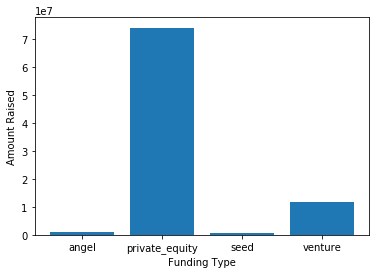

In [176]:
# getting the list of funding type and the total investment done in two separte list and plot the bar chart for the same
ft_investment = merge_df_grp_fund_type1['raised_amount_usd'].to_list()
ft_name = merge_df_grp_fund_type1['funding_round_type'].to_list()
plt.xlabel("Funding Type")
plt.ylabel("Amount Raised")
plt.bar(ft_name, ft_investment)

<BarContainer object of 9 artists>

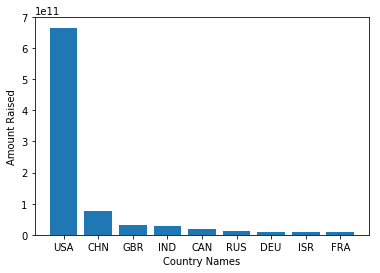

In [177]:
# getting the top 9 countries in the decreasing order of their investment with the compnay at first positin with highest investment
# and plotting the bar chart for the same
country_code_wise_investment = country_code_wise_investment.head(9)
county_wise_amount_raised = country_code_wise_investment['raised_amount_usd'].to_list()
country_names = country_code_wise_investment['country_code'].to_list()
plt.xlabel("Country Names")
plt.ylabel("Amount Raised")
plt.bar(country_names, county_wise_amount_raised)

<BarContainer object of 3 artists>

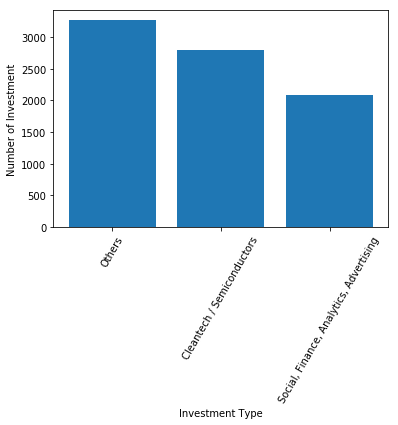

In [178]:
# plot for USA countries showing number of investement for top 3 investement type
df1_merge_grp = df1_merge_grp.head(3)
df1_grp_count = df1_merge_grp['count'].to_list()
df1_main_sector = df1_merge_grp['main_sector'].to_list()
plt.xticks(rotation=60)
plt.xlabel("Investment Type")
plt.ylabel("Number of Investment")
plt.bar(df1_main_sector, df1_grp_count)

<BarContainer object of 3 artists>

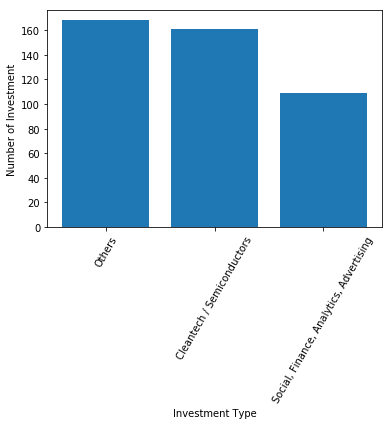

In [179]:
# plot for GBR countries showing number of investement for top 3 investement type
df2_merge_grp = df2_merge_grp.head(3)
df2_grp_count = df2_merge_grp['count'].to_list()
df2_main_sector = df1_merge_grp['main_sector'].to_list()
plt.xticks(rotation=60)
plt.xlabel("Investment Type")
plt.ylabel("Number of Investment")
plt.bar(df2_main_sector, df2_grp_count)

<BarContainer object of 3 artists>

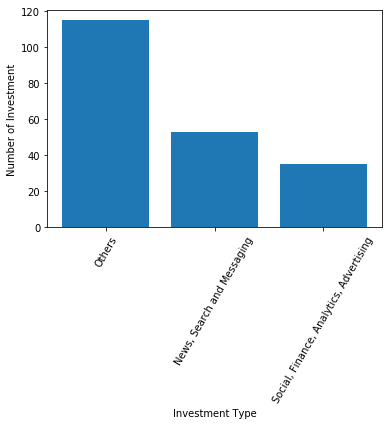

In [180]:
# plot for IND countries showing number of investement for top 3 investement type
df3_merge_grp = df3_merge_grp.head(3)
df3_grp_count = df3_merge_grp['count'].to_list()
df3_main_sector = df3_merge_grp['main_sector'].to_list()
plt.xticks(rotation=60)
plt.xlabel("Investment Type")
plt.ylabel("Number of Investment")
plt.bar(df3_main_sector, df3_grp_count)